# MODELO CLASIFICACION RANDOM FOREST


Presentamos e Importamos todas las librerias que vamos a necesitar a lo largo del modelo.



In [1]:
import pandas as pd
import numpy as np

#Libreria Metricas
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import auc
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss

#Librerias Visualizacion
import matplotlib.pyplot as plt
import pylab as pl
import seaborn as sns 
from pylab import rcParams 
from matplotlib import pyplot

#Librerias Modelos
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split 



Leemos y presentamos nuestra Base de Datos. Mostramos las 5 primeras filas, el tipo y el nombre de las Columnas / variables que la componen. Las variables que se refierne a unidades de negocio no las vamos a utilizar en el modelo por lo que las transformamos a Objeto para un mejor entendimiento y segmentacion de las propias variables. 

In [2]:
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/0rigin_data/cleanned_data/df.tfm')

In [3]:
# Transformamos variables unidad de negocio en object ya que no queremos utilizarlas.
df[["cliente", "gestor",
    'codigo_cartera', 'dz', 'oficina']] = df[["cliente", "gestor",
                                              'codigo_cartera', 'dz', 'oficina']].astype(object);

In [4]:
df.head(5)

,cliente,saldo_captacion,esta_carterizado,cliente_bbp,tipo_gestor,gestor,cartera_patron,codigo_cartera,digital_3_meses,camino_digital,...,edad,seg_valor,seg_recorrido,dz,oficina,lp_seg_vida,lp_seg_acc,lp_seg_salud,lp_seg_hogar,lp_seg_auto
0,1,1328106.49,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,69.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,1,0
1,2,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,ASESORAMIENTO FINANCIERO,14881.0,SI,COMPRADOR,...,81.0,ALTO,ALTO RECORRIDO,2,210,0,0,0,0,0
2,3,1142234.34,SI,NO,ASESOR FINANCIERO,18287.0,TUTELA,28332.0,NO,SIN USO,...,75.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
3,4,1340503.88,SI,NO,ASESOR FINANCIERO,41475.0,ASESORAMIENTO FINANCIERO,14204.0,NO,SIN USO,...,94.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0
4,5,1758517.70,SI,NO,ASESOR FINANCIERO,39000.0,ASESORAMIENTO FINANCIERO,14219.0,SI,COMPRADOR,...,64.0,ALTO,BAJO RECORRIDO,2,210,0,0,0,0,0


In [5]:
df.columns

Index(['cliente', 'saldo_captacion', 'esta_carterizado', 'cliente_bbp',
       'tipo_gestor', 'gestor', 'cartera_patron', 'codigo_cartera',
       'digital_3_meses', 'camino_digital', 'saldo_financiacion', 'saldo_ffii',
       'saldo_plp', 'lp_dom_ingresos', 'lp_tjta_cto', 'lp_tjt_rev', 'lp_rbos',
       'lp_of_int', 'marca_bp', 'marca_ccte', 'edad', 'seg_valor',
       'seg_recorrido', 'dz', 'oficina', 'lp_seg_vida', 'lp_seg_acc',
       'lp_seg_salud', 'lp_seg_hogar', 'lp_seg_auto'],
      dtype='object')

## PRIMERA APROXIMACION AL MODELO

In [6]:
df = df.select_dtypes('number')

In [7]:
# Inputs y Target 
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6319236 (451374, 14)
Datos y = 451374 (451374,)


In [8]:
clfforest = RandomForestClassifier()

In [9]:
clfforest.fit(X,y)

RandomForestClassifier()

In [10]:
clfforest.predict(X)

array([1, 0, 0, ..., 0, 0, 0])

In [11]:
test_size = 0.20
seed = 7
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [12]:
clfforest.fit(X_train,y_train)

RandomForestClassifier()

In [13]:
clfforest.predict(X_test)

array([0, 0, 1, ..., 0, 0, 0])

In [14]:
clfforest.predict_proba(X_test)[:, 1]

array([0.08, 0.29, 0.56, ..., 0.09, 0.17, 0.19])

In [15]:
print('== Primera Aproximacion TREE_model ==')
print ('accuracy_score =', accuracy_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('precision  =', precision_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfforest.predict_proba(X_test)[:, 1]))
print('====================================')
print('classification_report')
print(classification_report(y_test, clfforest.predict(X_test)))

== Primera Aproximacion TREE_model ==
accuracy_score = 0.8564829687067295
precision  = 0.4100476263634967
recall = 0.2264743317776835
f1_score = 0.2917896578113043
roc_auc_score = 0.7830913687839299
classification_report
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     78490
           1       0.41      0.23      0.29     11785

    accuracy                           0.86     90275
   macro avg       0.65      0.59      0.61     90275
weighted avg       0.83      0.86      0.84     90275



Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.783


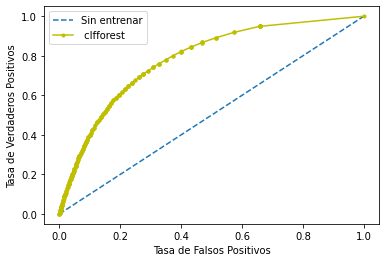

In [17]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clfforest.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' clfforest' , color = "y")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

## MODELO

In [19]:
#df_normalizado
df = pd.read_csv('/home/dsc/Master-Kschool/TFM/Financial-Product-Sales-Forecast-Model/Preprocessing/df_encoded.csv')

In [20]:
df.sample(15)

,saldo_captacion,saldo_financiacion,edad,seg_valor,saldo_ffii,saldo_plp,lp_dom_ingresos,camino_digital,seg_recorrido,marca_ccte,lp_seg_vida,lp_seg_auto,marca_bp,lp_tjta_cto,lp_tjt_rev,lp_seg_acc,lp_seg_hogar
365298,14213.02,42.71,38.0,2,0,0,1,1,2,1,0,0,0,1,0,0,0
193454,89562.36,1204.13,80.0,0,0,0,1,1,0,0,0,0,1,1,0,0,0
413957,60632.61,0.00,73.0,0,0,0,0,3,1,0,0,0,1,0,0,0,0
116060,1037.42,1287.51,57.0,0,0,0,1,1,0,0,1,0,0,1,0,0,0
62465,5.06,399.80,29.0,2,0,0,1,4,2,0,0,0,0,1,0,0,0
286359,782.64,0.00,62.0,1,0,0,0,3,0,2,0,0,0,0,0,0,0
81073,10644.08,16065.27,55.0,2,0,0,1,3,0,2,0,0,0,1,1,0,0
45682,840.51,0.00,33.0,1,0,0,0,1,0,2,0,0,0,0,0,0,0
330485,3326.52,7731.41,41.0,2,0,0,1,0,2,1,0,0,0,1,0,0,0
372752,1188.81,153701.72,32.0,0,0,0,1,4,2,1,1,0,0,1,1,0,1


In [21]:
# Liberias Precargadas al inicio del notebook
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [22]:
X = df.drop(['lp_seg_hogar'], axis = 1)
y= df['lp_seg_hogar']
print('Datos X =', X.size, X.shape)
print('Datos y =', y.size, y.shape)

Datos X = 6684992 (417812, 16)
Datos y = 417812 (417812,)


In [23]:
test_size = 0.2
seed = 47
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = seed)

In [24]:
X_train.shape,X_train.shape

((334249, 16), (334249, 16))

In [25]:
X_test.shape,y_test.shape

((83563, 16), (83563,))

In [26]:
clfforest = RandomForestClassifier(class_weight = 'balanced')

In [27]:
clfforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced')

In [28]:
clfforest.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
clfforest.predict_proba(X_test)[:, 1]

array([0.07, 0.05, 0.  , ..., 0.  , 0.  , 0.04])

In [30]:
clfforest.predict_proba(X_test)

array([[0.93, 0.07],
       [0.95, 0.05],
       [1.  , 0.  ],
       ...,
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.96, 0.04]])

__Primeros resultados__. Los resultados obtenidos de train y test utilizando como medida la metrica recall informan que el modelo no esta generalizando bien. Existe un calara situacion de overfiting que debo solucionar. Lo confirmarmos mediante Cross Validation. Para buscar soluciones y como siguiente paso utilizaremos Grid Search para buscar los mejores parametros a utilizar con este modelo y poder obtener una metrica correcta.


In [31]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfforest.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfforest.predict(X_test)))

===========RECALL TRAIN============
recall = 0.9996274870716101
===========RECALL TEST=============
recall = 0.3771807397069086


Text(0.5, 0, 'max_deep')

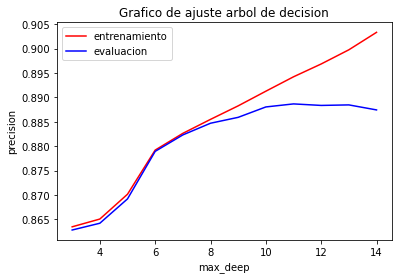

In [32]:
# Grafico de ajuste del árbol de decisión
train_prec =  []
eval_prec = []
max_deep_list = list(range(3, 15))

for deep in max_deep_list:
    arbol3 = DecisionTreeClassifier(criterion='gini', max_depth=deep)
    arbol3.fit(X_train, y_train)
    train_prec.append(arbol3.score(X_train, y_train))
    eval_prec.append(arbol3.score(X_test, y_test))

# graficar los resultados.
plt.plot(max_deep_list, train_prec, color='r', label='entrenamiento')
plt.plot(max_deep_list, eval_prec, color='b', label='evaluacion')
plt.title('Grafico de ajuste arbol de decision')
plt.legend()
plt.ylabel('precision')
plt.xlabel('max_deep')

## Tecnicas Validacion Cruzada.  Metrics: Cross validation
Utilizamos Cross Validation para iterar con 'K_folds_veces' a lo largo del set de entrenamiento
- K_Fold utilizado 5 veces.

- Apartaremos 1/5 de muestras.
- Entrenamos al modelo con el restante 4/5 de muestras.
- Mediremos con distintas metricas el resultado obtenido sobre las muestras apartadas.
- Esto quiere decir que hacemos 5 entrenamientos independientes.
- Los resultados serán el promedio de las 5 accuracies anteriores.

In [33]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfforest,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfforest,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfforest,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.6027477744184525, 0.3746935201401051, 0.4616188513075425)

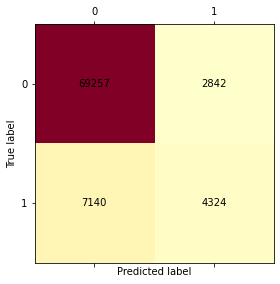

In [48]:
matriz_confusion_clfforest = confusion_matrix(y_test,clfforest.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(matriz_confusion_clfforest, cmap=plt.cm.YlOrRd)
for i in range(matriz_confusion_clfforest.shape[0]):
    for j in range(matriz_confusion_clfforest.shape[1]):
        ax.text(x=j, y=i, s=matriz_confusion_clfforest[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [36]:
print('========= CLFFOREST ==================')
print ('accuracy_score = ', accuracy_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfforest.predict_proba(X_test)[:, 1]))
print('====================================')


========= CLFFOREST ==================
accuracy_score =  0.8805452173808982
precision = 0.6034049679039911
recall = 0.3771807397069086
f1_score = 0.46419753086419757
roc_auc_score = 0.8637100831746748


## GridSearchCV  


In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
# RandomForestClassifier() solo para ver los parametros

In [39]:
forest_grid_params = {
    'n_estimators' : [100,125],
    'max_features' : ["auto", "log2"],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [2,4,6,8,10],
    #'max_depth' : [None],
    #'min_samples_split' : [2,4,6,8,10],
    'min_samples_split' :[2]
    #'min_samples_leaf' : [20,25,30]
    }

forestgs = GridSearchCV(
        clfforest,
        forest_grid_params,
        verbose = 1,
        cv = 3,
        n_jobs = -1
        )


In [40]:
forestgs.fit(X_train,y_train)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_features': ['auto', 'log2'],
                         'min_samples_split': [2], 'n_estimators': [100, 125]},
             verbose=1)

In [41]:
forestgs.best_score_

0.7796463108531301

In [42]:
forestgs.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=10,
                       max_features='log2', n_estimators=125)

In [43]:
forestgs.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 2,
 'n_estimators': 125}

## Hacemos el modelo con los mejores parametros

In [49]:
clfforest = RandomForestClassifier(class_weight = 'balanced', criterion = 'gini',
                                  max_depth = 2, max_features = 'log2', min_samples_split = 2,
                                  n_estimators = 125)

In [50]:
clfforest.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=2,
                       max_features='log2', n_estimators=125)

In [51]:
clfforest.predict(X_test)

array([1, 1, 0, ..., 0, 0, 0])

In [52]:
clfforest.predict_proba(X_test)[:, 1]

array([0.56020201, 0.5958052 , 0.31843997, ..., 0.1634812 , 0.29839398,
       0.19052235])

__Evaluacion de overfiting.__ Los resultados obtenidos de train y test utilizando como medida la metrica recall informan que se ha conseguido mediante utilizacion de mejores parametros resolver el overfiting.Lo confirmarmos mediante Cross Validation y distintas medias de metricas. 


In [53]:
print('===========RECALL TRAIN============')
print('recall =', recall_score(y_train,clfforest.predict(X_train)))
print('===========RECALL TEST=============')
print('recall =', recall_score(y_test,clfforest.predict(X_test)))

===========RECALL TRAIN============
recall = 0.912240336576387
===========RECALL TEST=============
recall = 0.9129448709002094


## Metrics: Cross validation

In [44]:
from sklearn.model_selection import cross_val_score
cross_val_score_precision = cross_val_score(clfforest,X,y,cv=5,scoring="precision").mean()
cross_val_score_recall = cross_val_score(clfforest,X,y,cv=5,scoring="recall").mean()
cross_val_score_f1 = cross_val_score(clfforest,X,y,cv=5,scoring="f1").mean() 
cross_val_score_precision , cross_val_score_recall, cross_val_score_f1

(0.2762398094466271, 0.9072329246935201, 0.4239611812505057)

### Confussion Matrix

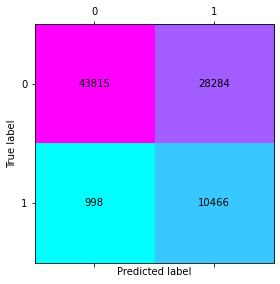

In [55]:
matriz_confusion_clfforest = confusion_matrix(y_test,clfforest.predict(X_test))
fig, ax = plt.subplots(figsize=(4, 7))
ax.matshow(matriz_confusion_clfforest, cmap=plt.cm.cool)
for i in range(matriz_confusion_clfforest.shape[0]):
    for j in range(matriz_confusion_clfforest.shape[1]):
        ax.text(x=j, y=i, s=matriz_confusion_clfforest[i, j], va='center', ha='center')

plt.xlabel('Predicted label')
plt.ylabel('True label')

plt.tight_layout()
#plt.savefig('images/06_09.png', dpi=300)
plt.show()

In [56]:
print('========= CLFFOREST ================')
print ('accuracy_score = ', accuracy_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('precision =', precision_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('recall =', recall_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('f1_score =', f1_score(y_test,clfforest.predict(X_test)))
print('====================================')
print('roc_auc_score =', roc_auc_score(y_test,clfforest.predict_proba(X_test)[:, 1]))
print('====================================')
#print('classification_report')
#print(classification_report(y_test, clfknn.predict(X_test)))3c445ddeb657

========= CLFFOREST ================
accuracy_score =  0.6495817526895875
precision = 0.27009032258064514
recall = 0.9129448709002094
f1_score = 0.41685585693232957
roc_auc_score = 0.8204022198551583


## Curva Roc

Sin entrenar: ROC AUC=0.500
Regresión Logística: ROC AUC=0.820


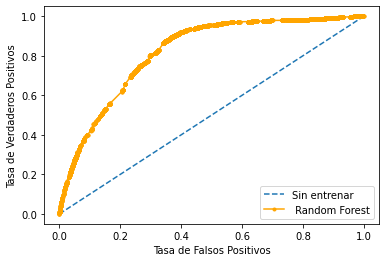

In [57]:
#Generamos un clasificador sin entrenar , que asignará 0 a todo
sin_entrenar = [0 for _ in range(len(X_test))]
# Calculamos el AUC
ns_auc = roc_auc_score(y_test, sin_entrenar)
lr_auc = roc_auc_score(y_test, clfforest.predict_proba(X_test)[:, 1])
# Imprimimos en pantalla
print('Sin entrenar: ROC AUC=%.3f' % (ns_auc))
print('Regresión Logística: ROC AUC=%.3f' % (lr_auc))
# Calculamos las curvas ROC
ns_fpr, ns_tpr, _ = roc_curve(y_test, sin_entrenar)
lr_fpr, lr_tpr, _ = roc_curve(y_test, clfforest.predict_proba(X_test)[:, 1])
# Pintamos las curvas ROC
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='Sin entrenar')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label=' Random Forest', color = "orange")
# Etiquetas de los ejes
pyplot.xlabel('Tasa de Falsos Positivos')
pyplot.ylabel('Tasa de Verdaderos Positivos')
pyplot.legend()
pyplot.show()

 ## *** Conclusiones Modelo ***

- __La metrica elegida__ para evaluar nuestro  Modelo de clasificacion Random Forest es __Recall y AUC - Curva Roc.__ 
- Iniciamos nuestro modelo con una __primera aproximacion__ obteniendo unos resultados __muy mejorables. Recall 0.22__ La base de datos utilizada es la original sin haber realizado ningun preprocesado. 
- Evolucionamos nuestro modelo. Utilizamos como base de datos df_normalizado ya preprocesada en nuestro bloque de preprocessing. (Adaptado, aplicado Label Encoder, Standar Scaler y  Normalizado variables.)  
- Dado que nuestro __Target esta muy desbalanceado__ a razon de 87% No y 13% Si, en el entremaniemto del modelo se ha utilizado de inicio el parametro de 'class_weight = 'balanced'
- __Vemos de inicio como nuestro set de entramiento no ha generalizado bien. Existe una gran diferencia entre los resultados obtenidos de Test y Train. 99 Train - 37 Test. Podemos en este caso confirmar la existencia de overfiting__ Comprobamos mediante Cross Validation obteniendo medias de distintas metricas.

- Necesitamos mejorar el modelo y para ello utilizamos GridSearch para buscar soluciones y mejores parametros. Una vez obtenidos, entrenamos de nuevo y sacamos nuevamente metricas Recall 0.909 Train - 0.0987 Test para confirmar entre otras cosas que hemos conseguido solucionar el overfiting y que nuestro modelo ha conseguido generalizar bien. Confirmamos con Cross Validation obteniendo las medias de distintas metricas con 5 validaciones.
- _Nuestras metricas elegidas finalmente son Reccal 0.90 y AUC 0,82 que consideramos apropiadas para la explicacion de nuestro modelo. 
- Por ultimo confirmar todo lo anteriormente expuesto con el estudio de la matriz de confusion. Obtenemos unos resultados de Falsos negativos 1045  y verdaderos negativos 10419.  En nuestro modelo prima la deteccion de clientes que no van a contratar el seguro. Detectando aquellos clientes que no son susceptibles de tener el seguro de hogar podemos trabajar con aquellos que si pueden tenerlo. Todo ello con un objetivo de optimizacion del tiempo y eficiencia comercial.
- Se echan en falta, entre otras muchas, variables y datos como la renta de los clientes,  tipo de trabajo,  o nomina real en euros obtenida. 

In [98]:
X_new = pd.DataFrame({'edad':[35], 'saldo_captacion':[10000], 'saldo_financiacion':[0], 'saldo_ffii':[10000],
       'saldo_plp':[100000], 'lp_dom_ingresos':[1], 'lp_tjta_cto':[1], 'lp_tjt_rev':[0.53], 'lp_rbos':[1],
       'lp_of_int':[1], 'lp_seg_vida':[1], 'lp_seg_acc':[1], 'lp_seg_salud':[1], 'lp_seg_auto':[1],
       'cartera_patron_etiqueta':[1], 'digital_3_meses_etiqueta':[1],
       'camino_digital_etiqueta':[1], 'marca_bp_etiqueta':[1], 'marca_ccte_etiqueta':[1],
       'seg_valor_etiqueta':[1], 'seg_recorrido_etiqueta':[1]})

In [99]:
clfforest.predict(X_new)

array([0.])

In [100]:
clfforest.predict_proba(X_new)

array([[0.6150677, 0.3849323]])